In [1]:
try :
    # % tensorflow_version only exists in Colab .
    % tensorflow_version 2. x
except Exception :
    pass

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import stockstats
import os
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from lib.rens import rens

In [63]:
def create_dataset(dataset, true_price, look_back = 1, look_forward = 1):
      
    # MinMax
    #min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    #dataset = min_max_scaler.fit_transform(dataset)
    
    # Standarised
    sc = preprocessing.StandardScaler()
    dataset = sc.fit_transform(dataset)

    
    #print(dataset)
    lookback = look_back
    datax = []
    datay = []
    
    # Time1
    # [x1, x2, x3]
    # time2
    # [x1, x2, x3]
    # Target y kan være som det er
    # (sampels, lookbacks, features)
    
    # Append først den ene så den andre
    datax1 = []
    datax2 = []
    #for i,features in enumerate(dataset):
    #    if i > lookback:
    #        for j in range(lookback, 0, -1):
                
                
            #datax1.append([dataset[i-j][0] for j in range(lookback, 0, -1)]) #x1
            #datax2.append([dataset[i-j][1] for j in range(lookback, 0, -1)]) #x2
    #        datay.append(true_price[i])  
    
    for i,v in enumerate(dataset):
        if i > lookback + look_forward:
            datax.append([dataset[i-j] for j in range(lookback, 0, -1)])
            datay.append([true_price[i-j] for j in range(lookback+look_forward, lookback, -1)])    

    #datax.append(datax1)
    #datax.append(datax2)
    
    datax = np.array(datax)
    datay = np.array(datay)
    
    # Standardize y data
    mean = datay.mean(axis=0)
    datay -= mean
    std = datay.std(axis=0)
    datay /= std

    print(datax.shape)
    
    
    
    # Normalize
    #datax = preprocessing.normalize(datax)
    #datay = preprocessing.normalize(datay)
    
    # reshape input to be [samples, time steps, features]
    #datax = np.reshape(datax, (datax.shape[0], lookback, 1))
    
    return datax, datay

In [5]:
def make_ready(filer):
    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} renset" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        stock = stockstats.StockDataFrame.retype(data)
        indikatorer = ['rsi_20', 'trix', 'open_8_sma', 'open_16_sma', 'macds', 'open_30_sma', 'open_5_sma']
        for ind in indikatorer:
            stock.get(ind)
        stock['sma8-16'] = [stock.open_8_sma[i] - stock.open_16_sma[i] for i, value in enumerate(stock.open_8_sma)]
        stock['sma30_derivert'] = [stock.open_30_sma[i] / stock.open_30_sma[i-1] if i>1 else 1 
                                   for i, value in enumerate(stock.open_30_sma)]
        stock['sma5_derivert'] = [stock.open_5_sma[i] / stock.open_5_sma[i-1] if i>1 else 1 
                                   for i, value in enumerate(stock.open_5_sma)]
        stock['derivert'] = [stock.open[i] / stock.open[i-1] if i>1 else 1
                             for i, value in enumerate(stock.open)]

        #evaluate_trades(stock)
        break # må tas bort ettervært
    
    return stock

    
def add_data(word):
    ordet = 'data/' + word
    return ordet

In [6]:
cleanup = rens()

In [98]:
filer = list(map(add_data, os.listdir('data/')))[71:712] # 60 første er lagd til å bygge modell
data = make_ready(filer)
data

C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


,tid,open,close,high,low,volume,amount,close_-1_s,close_-1_d,rs_20,...,open_16_sma,macd,macds,macdh,open_30_sma,open_5_sma,sma8-16,sma30_derivert,sma5_derivert,derivert
0,9:0,354.9,354.9,354.9,354.9,2298,2298,NaN,NaN,NaN,...,354.90000,0.000000,0.000000,0.000000,354.900000,354.90,0.00000,1.000000,1.000000,1.000000
1,9:1,353.6,353.6,353.6,353.6,880,880,354.9,-1.3,0.000000,...,354.25000,-0.029167,-0.016204,-0.012963,354.250000,354.25,0.00000,1.000000,1.000000,1.000000
2,9:2,352.3,352.3,352.3,352.3,612,612,353.6,-1.3,0.000000,...,353.60000,-0.077477,-0.041316,-0.036161,353.600000,353.60,0.00000,0.998165,0.998165,0.996324
3,9:3,352.8,352.8,352.8,352.8,2362,2362,352.3,0.5,0.207620,...,353.40000,-0.079498,-0.054250,-0.025248,353.400000,353.40,0.00000,0.999434,0.999434,1.001419
4,9:4,352.9,352.9,352.9,352.9,1182,1182,352.8,0.1,0.251329,...,353.30000,-0.074944,-0.060406,-0.014538,353.300000,353.30,0.00000,0.999717,0.999717,1.000283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,16:16,354.0,354.0,354.0,354.0,1186,1186,353.8,0.2,1.960962,...,352.85625,0.510298,0.395469,0.114829,352.320000,353.58,0.26875,1.000208,1.000793,1.000565
331,16:17,354.7,354.7,354.7,354.7,1158,1158,354.0,0.7,2.351037,...,352.98125,0.600265,0.436428,0.163837,352.413333,353.88,0.49375,1.000265,1.000848,1.001977
332,16:18,354.4,354.4,354.4,354.4,654,654,354.7,-0.3,1.999226,...,353.10000,0.639980,0.477138,0.162842,352.516667,354.10,0.60000,1.000293,1.000622,0.999154
333,16:19,354.4,354.4,354.4,354.4,2771,2771,354.4,0.0,1.999226,...,353.20625,0.663803,0.514471,0.149331,352.636667,354.26,0.71875,1.000340,1.000452,1.000000


In [99]:
datax, datay = create_dataset(data[['macd']], data.sma30_derivert, look_back=30, look_forward=15)

(289, 30, 1)


In [80]:
datay.shape  # ide: Ta siste x for å finne neste y. Del opp datasettet der etter

(341, 15)

In [89]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(input_dim=datax.shape[2], units=256, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=264, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(datay.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, None, 256)         264192    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 264)               550176    
_________________________________________________________________
dropout_9 (Dropout)          (None, 264)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                3975      
Total params: 818,343
Trainable params: 818,343
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.fit(datax, datay, epochs=25, batch_size=64, validation_split=0.2)#,
         ##callbacks= [keras.callbacks.EarlyStopping(
                                  #  monitor='val_loss', patience=10, restore_best_weights=True)])

Train on 272 samples, validate on 69 samples
Epoch 1/25
272/272 [==============================] - 12s 42ms/sample - loss: 0.9391 - val_loss: 1.4756
Epoch 2/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.7485 - val_loss: 1.7452
Epoch 3/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.6090 - val_loss: 1.4978
Epoch 4/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.5356 - val_loss: 1.5273
Epoch 5/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.5007 - val_loss: 1.5617
Epoch 6/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.4703 - val_loss: 1.8686
Epoch 7/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.4657 - val_loss: 1.9172
Epoch 8/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.4906 - val_loss: 1.5422
Epoch 9/25
272/272 [==============================] - 2s 9ms/sample - loss: 0.4665 - val_loss: 1.9314
Epoch 10/25
272/272 [==============

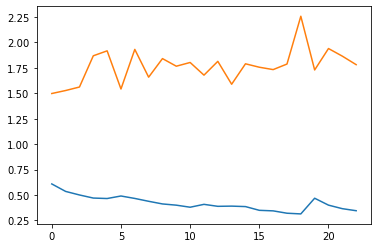

In [91]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])

In [100]:
predict = model.predict(datax)

In [102]:
datax[20]

array([[ 2.38683947],
       [ 2.28340184],
       [ 2.17642417],
       [ 2.01542649],
       [ 1.73484478],
       [ 1.548307  ],
       [ 1.25232452],
       [ 0.79405731],
       [ 0.58598001],
       [ 0.41653157],
       [ 0.19910195],
       [-0.08034435],
       [-0.27126546],
       [-0.3637726 ],
       [-0.18975484],
       [-0.05108416],
       [ 0.00437244],
       [ 0.04796229],
       [-0.18858281],
       [-0.53389064],
       [-0.689741  ],
       [-0.72242161],
       [-0.68531208],
       [-0.56676344],
       [-0.3857145 ],
       [-0.13052949],
       [ 0.04386721],
       [-0.0375594 ],
       [-0.01902369],
       [-0.08582028]])

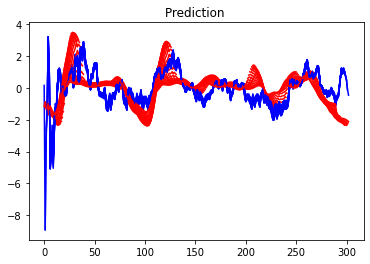

In [108]:
for i in range(len(datay)):
    plt.plot(range(i,i+15), datay[i], c='blue')
    plt.plot(range(i,i+15), predict[i], c='red')

#plt.plot(range(0,15), datay[19], label='true')
#plt.plot(range(1,16), datay[20], label='true')
#plt.plot(range(1,16), predict[20], label='predicted')
#plt.legend()
plt.title('Prediction ')
plt.savefig('images/RNN_15_ahead')
plt.show()


In [85]:
predict[0]

array([0.76824886, 0.98426884, 1.1329707 , 0.989848  , 1.1416246 ,
       1.0954686 , 0.9367621 , 0.94854134, 0.5770784 , 0.5705154 ,
       0.5571046 , 0.36905763, 0.28623486, 0.27843568, 0.05921907],
      dtype=float32)

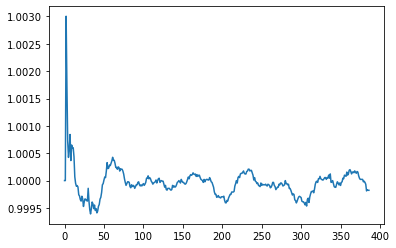

In [58]:
plt.plot(data.sma30_derivert)
#plt.plot(data.sma5_derivert)

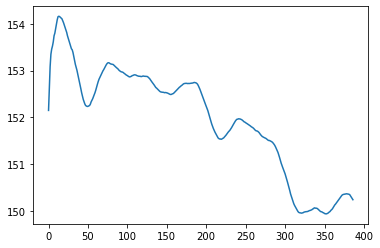

In [50]:
plt.plot(data.open_30_sma)
#plt.plot(data.sma5_derivert)

In [53]:
# Save model

#model.save('rnn_model')

INFO:tensorflow:Assets written to: rnn_model\assets


In [56]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 0223-158D

 Directory of C:\Users\Stian\Documents\School\99. Div\intradag

19.09.2020  00.30    <DIR>          .
19.09.2020  00.30    <DIR>          ..
16.08.2020  17.38    <DIR>          .idea
01.09.2020  19.48    <DIR>          .ipynb_checkpoints
24.08.2020  21.27    <DIR>          data
26.08.2020  22.16    <DIR>          history
18.09.2020  19.30    <DIR>          images
25.08.2020  13.08    <DIR>          lib
30.08.2020  10.25           514ÿ958 make_model.ipynb
19.09.2020  00.30    <DIR>          models
29.08.2020  11.29               664 README.md
19.09.2020  00.29           132ÿ506 RNN_trial.ipynb
16.08.2020  17.14         3ÿ922ÿ732 smadaytrade.ipynb
01.09.2020  20.07           775ÿ971 use_model.ipynb
17.08.2020  12.53    <DIR>          __pycache__
               5 File(s)      5ÿ346ÿ831 bytes
              10 Dir(s)  75ÿ003ÿ355ÿ136 bytes free
